# Supervised Machine Learning Models

### The models utilize 19 clinical attributes to predict breast cancer survival
#### The Models used were Logistic Regression, Support Vector Classification, Random Forest Classifier, AdaBoost classifier, and XGBoost Classifier

#### The Random Forest Classifier produced the strongest accuracy at 0.696


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('../Data/df_clinical_survival_ML.csv')
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(50)



,age_at_diagnosis,chemotherapy,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival,radio_therapy,tumor_size,tumor_stage,encoded_type_of_breast_surgery,encoded_cancer_type_detailed,encoded_cellularity,encoded_pam50_+_claudin-low_subtype,encoded_er_status,encoded_her2_status,encoded_tumor_other_histologic_subtype,encoded_inferred_menopausal_state,encoded_integrative_cluster,encoded_pr_status
1,43.19,0,3.0,1,0,2.0,1,1,10.0,1.0,0,1,0,2,1,0,0,1,4,1
2,48.87,1,2.0,1,1,2.0,0,0,15.0,2.0,1,1,0,3,1,0,0,1,3,1
3,47.68,1,2.0,1,3,1.0,1,1,25.0,2.0,1,4,2,3,1,0,4,1,10,1
4,76.97,1,3.0,1,8,2.0,0,1,40.0,2.0,1,4,0,3,1,0,4,0,10,1
5,78.77,0,3.0,1,0,4.0,0,1,31.0,4.0,1,1,2,3,1,0,0,0,8,1
6,56.45,1,2.0,1,1,4.0,1,1,10.0,2.0,0,1,2,3,1,0,0,0,3,1
7,84.22,0,2.0,0,0,5.0,0,0,28.0,2.0,1,2,0,1,1,0,1,0,3,0
8,85.49,0,2.0,1,0,1.0,0,1,22.0,4.0,1,1,2,2,1,0,0,0,3,1
9,70.91,0,1.0,1,0,3.0,1,1,21.0,1.0,0,1,0,3,1,0,0,0,4,1
14,66.91,0,3.0,1,0,3.0,1,1,36.0,2.0,1,1,2,3,1,0,0,0,1,1


In [3]:
df.columns

Index(['age_at_diagnosis', 'chemotherapy', 'neoplasm_histologic_grade',
       'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count',
       'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage',
       'encoded_type_of_breast_surgery', 'encoded_cancer_type_detailed',
       'encoded_cellularity', 'encoded_pam50_+_claudin-low_subtype',
       'encoded_er_status', 'encoded_her2_status',
       'encoded_tumor_other_histologic_subtype',
       'encoded_inferred_menopausal_state', 'encoded_integrative_cluster',
       'encoded_pr_status'],
      dtype='object')

In [4]:
df=df[['age_at_diagnosis', 'chemotherapy',
       'hormone_therapy','overall_survival', 'radio_therapy',
       'tumor_size', 'tumor_stage','encoded_type_of_breast_surgery',
       'encoded_cancer_type_detailed',
#        'encoded_er_status', 'encoded_her2_status',
       'encoded_inferred_menopausal_state'
#        ,'encoded_pr_status'
      ]]

In [5]:
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
# Set features. Utilized as x values.
selected_features = df.drop(['overall_survival'], axis=1)

In [7]:
# Set X and y variables
y = df['overall_survival']
X = selected_features

print(X.shape, y.shape)

(1017, 9) (1017,)


In [8]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
# from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
X_train.head()

,age_at_diagnosis,chemotherapy,hormone_therapy,radio_therapy,tumor_size,tumor_stage,encoded_type_of_breast_surgery,encoded_cancer_type_detailed,encoded_inferred_menopausal_state
196,51.74,0,1,0,22.0,2.0,1,4,0
997,68.93,0,1,0,18.0,2.0,1,1,0
1028,81.57,0,1,0,35.0,2.0,1,1,0
407,52.98,0,0,1,10.0,1.0,0,1,0
1052,51.25,1,1,1,25.0,2.0,1,1,0


In [10]:
# Scale data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


In [11]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
print(predictions)

[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1
 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1]


In [12]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6509186351706037
Testing Data Score: 0.6039215686274509


In [13]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, 
                            target_names = ["1", "0"]))

              precision    recall  f1-score   support

           1       0.56      0.41      0.47       111
           0       0.62      0.76      0.68       144

    accuracy                           0.60       255
   macro avg       0.59      0.58      0.58       255
weighted avg       0.60      0.60      0.59       255



In [14]:
#GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 50, 100],
              'penalty': ['l1', 'l2'],
              'max_iter': [200,500,800],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(model, param_grid, verbose=3)

In [15]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=

C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_va

[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END C=10, max_iter=800, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, ma

C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_va

[CV 5/5] END C=50, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=50, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=50, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=50, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=50, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=50, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=50, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=50, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END C=50, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END C=50, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END C=50, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END C=50, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=50, ma

C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_va

[CV 3/5] END C=50, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=50, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=50, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=50, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=50, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=50, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=50, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=50, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=50, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=50, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=50, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=50, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END C=50, ma

C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_va

[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C

C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_va

GridSearchCV(estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [10, 50, 100], 'max_iter': [200, 500, 800],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=3)

In [16]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
0.6352253181974545


In [17]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report, confusion_matrix

def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    return test_pred, test_score, results.mean()

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
lr_params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }
logistic_regression = GridSearchCV(LogisticRegression(random_state=42), param_grid=lr_params, n_jobs=-1, cv=4)
lg_pred, lg_test, lg_train = model_metrics(logistic_regression, kfold, X_train, X_test, y_train.values, y_test.values)

CV scores:  [0.58823529 0.67973856 0.57236842 0.63157895 0.67763158]
CV Standard Deviation:  0.044296353121267514

CV Mean score:  0.6299105607155142
Train score:    0.6430446194225722
Test score:     0.6

Confusion Matrix: 
[[ 44  67]
 [ 35 109]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.56      0.40      0.46       111
           1       0.62      0.76      0.68       144

    accuracy                           0.60       255
   macro avg       0.59      0.58      0.57       255
weighted avg       0.59      0.60      0.59       255



In [19]:
#SVC Model import and use
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc_pred, svc_test, svc_train = model_metrics(svc, kfold, X_train, X_test, y_train, y_test)

CV scores:  [0.60130719 0.62745098 0.59868421 0.64473684 0.66447368]
CV Standard Deviation:  0.02522076121790435

CV Mean score:  0.6273305813553491
Train score:    0.6876640419947506
Test score:     0.6196078431372549

Confusion Matrix: 
[[ 54  57]
 [ 40 104]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.57      0.49      0.53       111
           1       0.65      0.72      0.68       144

    accuracy                           0.62       255
   macro avg       0.61      0.60      0.60       255
weighted avg       0.61      0.62      0.61       255



In [20]:
#AdaBoost model import and use
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=42)
ab_pred, ab_test, ab_train = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test)

CV scores:  [0.61437908 0.61437908 0.59210526 0.65131579 0.68421053]
CV Standard Deviation:  0.03258531976033108

CV Mean score:  0.6312779497764017
Train score:    0.6955380577427821
Test score:     0.6196078431372549

Confusion Matrix: 
[[ 54  57]
 [ 40 104]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.57      0.49      0.53       111
           1       0.65      0.72      0.68       144

    accuracy                           0.62       255
   macro avg       0.61      0.60      0.60       255
weighted avg       0.61      0.62      0.61       255



In [21]:
#RandomForest Model import and use
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)

CV scores:  [0.5751634  0.67973856 0.61184211 0.63815789 0.60526316]
CV Standard Deviation:  0.03513341882890285

CV Mean score:  0.62203302373581
Train score:    0.9986876640419947
Test score:     0.592156862745098

Confusion Matrix: 
[[57 54]
 [50 94]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       111
           1       0.64      0.65      0.64       144

    accuracy                           0.59       255
   macro avg       0.58      0.58      0.58       255
weighted avg       0.59      0.59      0.59       255



In [22]:
random_forest.predict_proba(X)

array([[0.7 , 0.3 ],
       [0.71, 0.29],
       [0.76, 0.24],
       ...,
       [0.89, 0.11],
       [0.71, 0.29],
       [0.84, 0.16]])

In [23]:
start_time = time.time()
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.021 seconds


In [24]:
importances = random_forest.feature_importances_
sorted(zip(random_forest.feature_importances_,selected_features.columns),reverse = True)

[(0.4331142998362242, 'age_at_diagnosis'),
 (0.2836394201737549, 'tumor_size'),
 (0.06233748423166784, 'tumor_stage'),
 (0.04903127727530473, 'encoded_cancer_type_detailed'),
 (0.04239478789546689, 'hormone_therapy'),
 (0.04207018773884366, 'encoded_type_of_breast_surgery'),
 (0.03591802247165952, 'radio_therapy'),
 (0.030680888792148156, 'chemotherapy'),
 (0.02081363158493017, 'encoded_inferred_menopausal_state')]

In [25]:
feature_names = [c for c in X.columns]

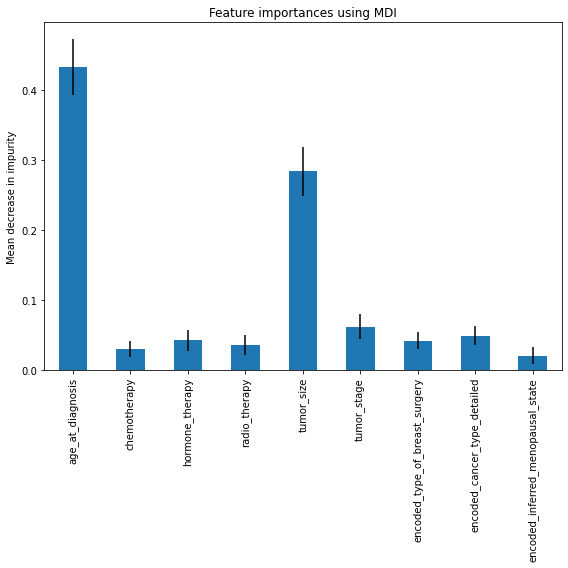

In [26]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(8,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [27]:
#Saving RandomForest Model for use as it produced strongest accuracy
# import joblib
# filename = 'randomForest_model.pkl'
# joblib.dump(random_forest, filename)

In [28]:
# #Testing loading the model back in
# rfm = joblib.load('randomForest_model.pkl')

In [29]:
# #Simply test of loaded saved model
# rfm.predict(X_test)

In [30]:
#Import XGB and use
from xgboost.sklearn import XGBClassifier

In [31]:
! pip install xgboost

In [32]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

clinical_xgb1_pred_, clinical_xgb1_test_score, clinical_xgb1_cv_score = model_metrics(xgb1, kfold, X_train, X_test, y_train, y_test)

[18:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel